In [1]:
import numpy as np
import pandas as pd
from python_package.data_prepare import data_info, save_object
from python_package.package_renewing.smartpandas import PandasTransform, PandasFeatureUnion
from python_package.package_renewing.smartpandas import CorrSpearman

# import seaborn as sns

# 1) CARGAMOS EL DATASET

In [2]:
## Select file name
file_name = 'data_example.csv'
data = pd.read_csv('../data/' + file_name, encoding='utf-16')


data_headers = data.iloc[:5]
data_columns = data.iloc[5:6].values[0]
data = data.iloc[6:]
data.columns = data_columns
data = data.reset_index(drop=True)
display (data.head())
print ("data |shape({}x{})".format(data.shape[0], data.shape[1]))

,Time,TFS-EE-226-BU-1_SUC-P.PV,TFS-EE-226-BU-2_SUC-P.PV,TFS-EE-226-BU-1_DISCH-P.PV,TFS-EE-226-BU-2_DISCH-P.PV,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,TFS-EE-176-MB_FC2-HDR-T.PV,TFS-EE-176-MB_FC2-HDR-GSF.PV,TFS-EE-176-MTR_OUT-P.PV,MLN-EE-76-U-1_SUC-P.PV,...,MLN-EE-76_DISCH-P.SP,MLN-EE-76_DISCH-P-CTRL.PV,MLN-EE-76_T.PV,MLN-EE-76_FLW.PV,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,TFS-EE-176-MB_FC-HDR-T.PV,MLN-IZ-76_HLD-P.SP,MLN-IZ-76_HLD-P-CTRL.PV,MLN-EE-76-PCV_POS.PV,TFS-EE-209-V-1523_VLV.ST
0,30-Aug-22 00:00:00,58.43447495,58.43531418,59.2284317,662.7059326,689,11.75028515,103,639.0352783,-6.174921513,...,3000,2995.553223,16.76471519,103.5668182,686.5142212,11.77899075,1250,1251.718628,28.63860512,CLOSED
1,30-Aug-22 00:00:01,58.43265152,58.45238876,59.22687912,662.7571411,689,11.75007439,103,639.0523682,-6.176139832,...,3000,2995.321289,16.76354027,103.5583649,686.5136719,11.77925777,1250,1251.78479,28.63473892,CLOSED
2,30-Aug-22 00:00:02,58.43082809,58.46946335,59.22532654,662.8084106,689,11.74986362,103,639.069458,-6.17735815,...,3000,2995.089355,16.76236343,103.5499039,686.5131836,11.77952385,1250,1251.850952,28.63087273,CLOSED
3,30-Aug-22 00:00:03,58.42900467,58.48653793,59.22377777,662.8596191,689,11.74965382,103,639.0864868,-6.178576469,...,3000,2994.857422,16.76118851,103.5414505,686.5126343,11.77979088,1250,1251.917114,28.62700653,CLOSED
4,30-Aug-22 00:00:04,58.42718124,58.49947357,59.22222519,662.8709106,689,11.74944305,103,639.06604,-6.179794788,...,3000,2994.625732,16.76001167,103.5329895,686.512146,11.77900887,1250,1251.983276,28.62314034,CLOSED


data |shape(1801x23)


# 2) INSPECCIONAMOS LAS COLUMNAS

Las columnas se convierten en filas, y se ordenan primero por "dtype" y por último por "count_unique"

In [3]:
## Get data info
data_info(data)

info de data,index,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,7,TFS-EE-176-MB_FC2-HDR-GSF.PV,0,0.0,object,1801,100.0,1
1,13,MLN-EE-76_DISCH-P.SP,0,0.0,object,1801,100.0,1
2,19,MLN-IZ-76_HLD-P.SP,0,0.0,object,1801,100.0,1
3,22,TFS-EE-209-V-1523_VLV.ST,0,0.0,object,1801,100.0,1
4,5,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,0,0.0,object,1801,100.0,768
5,17,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,0,0.0,object,1801,100.0,1591
6,21,MLN-EE-76-PCV_POS.PV,0,0.0,object,1801,100.0,1729
7,14,MLN-EE-76_DISCH-P-CTRL.PV,0,0.0,object,1801,100.0,1740
8,4,TFS-EE-226-BU-2_DISCH-P.PV,0,0.0,object,1801,100.0,1750
9,8,TFS-EE-176-MTR_OUT-P.PV,0,0.0,object,1801,100.0,1765


primera conclusión: Todos los valores están en formato texto

# 3) BUSCAMOS COLUMNAS FORMATO DATETIME

In [4]:
def check_type_dt(dataset):
    if isinstance(dataset.index, pd.core.indexes.datetimes.DatetimeIndex):
        print(f"\nSerie de tiempo: {dataset.index.name}\n")
        return dataset
    else:
        cols_dt = (dataset.dtypes == "<M8[ns]").values
        if cols_dt.sum() == 0:
            indice = check_type_str(dataset)
            print(f"\nSerie de tiempo: {indice}\n")
            dataset[indice] = pd.to_datetime(
                dataset[indice], infer_datetime_format=True
            )
            return dataset.set_index(indice)
        elif cols_dt.sum() == 1:
            indice = list(dataset.loc[:, cols_dt].columns)[0]
            print(f"\nSerie de tiempo: {indice}\n")
            return dataset.set_index(indice)
        else:
            indice = select_type_dt(dataset, cols_dt)
            print(f"\nSerie de tiempo: {indice}\n")
            return dataset.set_index(indice)


def check_type_str(dataset):
    cols_mask = (dataset.dtypes == "object").values
    cols_obj = dataset.loc[:, cols_mask].columns.values
    posible_dt = []
    if len(cols_obj) == 0:
        return print('No hay columnas tipo "object"')
    for i, elemento in enumerate(cols_obj):
        try:
            pd.to_datetime(dataset[elemento], infer_datetime_format=True)
            posible_dt.append(elemento)
        except:
            pass
    return select_type_dt(dataset, posible_dt)


def select_type_dt(dataset, posibles_dt):
    indice = list(dataset.loc[:, posibles_dt].columns)
    if len(indice) == 1:
        return indice[0]
    for i in range(len(indice)):
        indice[i] = str(i + 1) + ") {}".format(indice[i])
    print(">> SELECCION DE SERIE DE TIEMPO:")
    for i in range(len(indice)):
        print(indice[i])
    op = input(">> ")
    try:
        op = int(op) - 1  # para empezar a contar desde cero
        indice = list(dataset.loc[:, posibles_dt].columns)[op]
        return indice
    except:
        print("\nERROR: La opcion ingresada no corresponde\n")
        return


In [5]:
data = check_type_dt(data)
data_info(data.reset_index())


Serie de tiempo: Time



info de data,index,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,0,Time,0,0.0,datetime64[ns],1801,100.0,1801
1,7,TFS-EE-176-MB_FC2-HDR-GSF.PV,0,0.0,object,1801,100.0,1
2,13,MLN-EE-76_DISCH-P.SP,0,0.0,object,1801,100.0,1
3,19,MLN-IZ-76_HLD-P.SP,0,0.0,object,1801,100.0,1
4,22,TFS-EE-209-V-1523_VLV.ST,0,0.0,object,1801,100.0,1
5,5,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,0,0.0,object,1801,100.0,768
6,17,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,0,0.0,object,1801,100.0,1591
7,21,MLN-EE-76-PCV_POS.PV,0,0.0,object,1801,100.0,1729
8,14,MLN-EE-76_DISCH-P-CTRL.PV,0,0.0,object,1801,100.0,1740
9,4,TFS-EE-226-BU-2_DISCH-P.PV,0,0.0,object,1801,100.0,1750


# 4) BUSCAMOS COLUMNAS FORMATO NUMERICO

In [6]:
data = data.apply(lambda col: pd.to_numeric(col, errors='ignore'))
data_info(data.reset_index())

info de data,index,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,0,Time,0,0.0,datetime64[ns],1801,100.0,1801
1,7,TFS-EE-176-MB_FC2-HDR-GSF.PV,0,0.0,int64,1801,100.0,1
2,13,MLN-EE-76_DISCH-P.SP,0,0.0,int64,1801,100.0,1
3,19,MLN-IZ-76_HLD-P.SP,0,0.0,int64,1801,100.0,1
4,5,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,0,0.0,float64,1801,100.0,768
5,17,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,0,0.0,float64,1801,100.0,1591
6,21,MLN-EE-76-PCV_POS.PV,0,0.0,float64,1801,100.0,1729
7,14,MLN-EE-76_DISCH-P-CTRL.PV,0,0.0,float64,1801,100.0,1740
8,4,TFS-EE-226-BU-2_DISCH-P.PV,0,0.0,float64,1801,100.0,1750
9,8,TFS-EE-176-MTR_OUT-P.PV,0,0.0,float64,1801,100.0,1765


# 5) ELIMINAMOS COLUMNAS INNECESARIAS

In [7]:
data = data.drop(columns=[data.columns[-1]])
data_info(data.reset_index())

info de data,index,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,0,Time,0,0.0,datetime64[ns],1801,100.0,1801
1,7,TFS-EE-176-MB_FC2-HDR-GSF.PV,0,0.0,int64,1801,100.0,1
2,13,MLN-EE-76_DISCH-P.SP,0,0.0,int64,1801,100.0,1
3,19,MLN-IZ-76_HLD-P.SP,0,0.0,int64,1801,100.0,1
4,5,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,0,0.0,float64,1801,100.0,768
5,17,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,0,0.0,float64,1801,100.0,1591
6,21,MLN-EE-76-PCV_POS.PV,0,0.0,float64,1801,100.0,1729
7,14,MLN-EE-76_DISCH-P-CTRL.PV,0,0.0,float64,1801,100.0,1740
8,4,TFS-EE-226-BU-2_DISCH-P.PV,0,0.0,float64,1801,100.0,1750
9,8,TFS-EE-176-MTR_OUT-P.PV,0,0.0,float64,1801,100.0,1765


# 6) VISUALIZAR PRIMERAS Y ULTIMAS LINEAS, Y EXPORTAR DATASET

In [8]:
display (data.head(3))
display (data.tail(3))

save_object(data, 'samples/01_raw_data')

,TFS-EE-226-BU-1_SUC-P.PV,TFS-EE-226-BU-2_SUC-P.PV,TFS-EE-226-BU-1_DISCH-P.PV,TFS-EE-226-BU-2_DISCH-P.PV,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,TFS-EE-176-MB_FC2-HDR-T.PV,TFS-EE-176-MB_FC2-HDR-GSF.PV,TFS-EE-176-MTR_OUT-P.PV,MLN-EE-76-U-1_SUC-P.PV,MLN-EE-76-U-2_SUC-P.PV,...,MLN-EE-76-U-2_CAS-P.PV,MLN-EE-76_DISCH-P.SP,MLN-EE-76_DISCH-P-CTRL.PV,MLN-EE-76_T.PV,MLN-EE-76_FLW.PV,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,TFS-EE-176-MB_FC-HDR-T.PV,MLN-IZ-76_HLD-P.SP,MLN-IZ-76_HLD-P-CTRL.PV,MLN-EE-76-PCV_POS.PV
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-30 00:00:00,58.434475,58.435314,59.228432,662.705933,689.0,11.750285,103,639.035278,-6.174922,620.357971,...,7105.064941,3000,2995.553223,16.764715,103.566818,686.514221,11.778991,1250,1251.718628,28.638605
2022-08-30 00:00:01,58.432652,58.452389,59.226879,662.757141,689.0,11.750074,103,639.052368,-6.176140,620.295898,...,7103.961426,3000,2995.321289,16.763540,103.558365,686.513672,11.779258,1250,1251.784790,28.634739
2022-08-30 00:00:02,58.430828,58.469463,59.225327,662.808411,689.0,11.749864,103,639.069458,-6.177358,620.233765,...,7102.857910,3000,2995.089355,16.762363,103.549904,686.513184,11.779524,1250,1251.850952,28.630873


,TFS-EE-226-BU-1_SUC-P.PV,TFS-EE-226-BU-2_SUC-P.PV,TFS-EE-226-BU-1_DISCH-P.PV,TFS-EE-226-BU-2_DISCH-P.PV,TFS-EE-176-MB_FC-HDR-DEN-OBS.PV,TFS-EE-176-MB_FC2-HDR-T.PV,TFS-EE-176-MB_FC2-HDR-GSF.PV,TFS-EE-176-MTR_OUT-P.PV,MLN-EE-76-U-1_SUC-P.PV,MLN-EE-76-U-2_SUC-P.PV,...,MLN-EE-76-U-2_CAS-P.PV,MLN-EE-76_DISCH-P.SP,MLN-EE-76_DISCH-P-CTRL.PV,MLN-EE-76_T.PV,MLN-EE-76_FLW.PV,TFS-EE-176-MB_FC-HDR-DEN-COR.PV,TFS-EE-176-MB_FC-HDR-T.PV,MLN-IZ-76_HLD-P.SP,MLN-IZ-76_HLD-P-CTRL.PV,MLN-EE-76-PCV_POS.PV
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-30 00:29:58,58.908169,58.746300,59.859676,667.417175,693.863098,12.631309,103,643.634277,-6.174892,625.159241,...,7146.269043,3000,2998.904053,17.371363,103.834290,691.194885,12.654633,1250,1243.546509,28.669731
2022-08-30 00:29:59,58.903667,58.744080,59.849453,667.403687,693.868347,12.632117,103,643.607300,-6.183235,625.223816,...,7145.444336,3000,2998.930908,17.372541,103.850441,691.200745,12.655133,1250,1243.457764,28.669956
2022-08-30 00:30:00,58.923580,58.741856,59.839230,667.423584,693.873596,12.632927,103,643.647095,-6.186977,625.260803,...,7144.892578,3000,2998.957520,17.373722,103.856865,691.204712,12.655633,1250,1243.374390,28.670179


# 7) PROCESAMIENTO: CORRELACION SPEARMAN


In [9]:
## EJEMPLO: First target -> 'MLN-EE-76-U-1_CAS-P.PV'
target = data.columns[1]
vector_corr = CorrSpearman(target)

print (type(vector_corr).__name__)
features = vector_corr.fit_transform(data)

features

CorrSpearman


MLN-EE-76-U-1_CAS-P.PV             0.765952
MLN-IZ-76_HLD-P-CTRL.PV            0.046315
MLN-EE-76_FLW.PV                   0.287949
MLN-EE-76-U-1_SUC-P.PV             0.426603
MLN-EE-76_DISCH-P-CTRL.PV          0.461862
TFS-EE-176-MB_FC-HDR-DEN-COR.PV    0.492379
MLN-EE-76-PCV_POS.PV               0.672660
MLN-EE-76-U-2_CAS-P.PV             0.736961
TFS-EE-176-MTR_OUT-P.PV            0.775226
MLN-EE-76-U-2_SUC-P.PV             0.780130
TFS-EE-226-BU-2_DISCH-P.PV         0.801249
TFS-EE-226-BU-1_DISCH-P.PV         0.808921
TFS-EE-226-BU-1_SUC-P.PV           0.828300
TFS-EE-176-MB_FC-HDR-DEN-OBS.PV    0.843885
MLN-EE-76_T.PV                     0.868175
TFS-EE-176-MB_FC-HDR-T.PV          0.904345
TFS-EE-176-MB_FC2-HDR-T.PV         0.910555
TFS-EE-176-MB_FC2-HDR-GSF.PV            NaN
MLN-EE-76_DISCH-P.SP                    NaN
MLN-IZ-76_HLD-P.SP                      NaN
Name: TFS-EE-226-BU-2_SUC-P.PV, dtype: float64

In [10]:
corr_spearman = []
for target in data.columns:
    vector_corr = CorrSpearman(target)
    features = vector_corr.fit_transform(data)
    corr_spearman.append(features)

In [11]:
df_corr = pd.DataFrame(corr_spearman).T.fillna(0) # matriz de targets
df_corr;

# 8) CLUSTERIZACION

## Búsqueda de patrones por cluster jerárquico y visualización por dendograma

In [12]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt# REEMPLAZAR POR SEABORN


cluster_dict = {}

In [13]:
# mask_not_nul = data.corr('spearman').any().values
# labels_not_nul = data.loc[:, mask_not_nul].columns

In [14]:
X = StandardScaler().fit_transform(data.corr('spearman').fillna(0))
Z = linkage(X, "average")



lista_modos = ["ward", "average", "complete", "single"]

for elemento in lista_modos:
    Z = linkage(X, elemento)
    c, dist = cophenet(Z, pdist(X))
    print('coeficiente Cophenetic: "{}"" = {}'.format(elemento, "%.2f" % c))

coeficiente Cophenetic: "ward"" = 0.80
coeficiente Cophenetic: "average"" = 0.96
coeficiente Cophenetic: "complete"" = 0.86
coeficiente Cophenetic: "single"" = 0.93


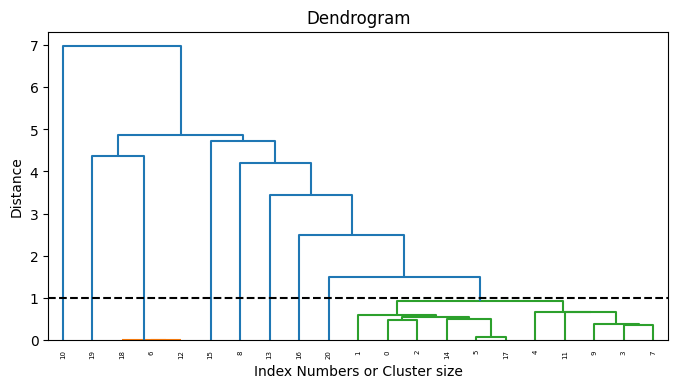

In [15]:
plt.figure(figsize=[8, 4])

ax = plt.axes()


plt.title("Dendrogram")
plt.xlabel("Index Numbers or Cluster size")
plt.ylabel("Distance")

dendrogram(
    Z,
    leaf_rotation=90.0,
    leaf_font_size=5.0,
    color_threshold=1,
    truncate_mode="lastp",
    ax=ax,
)

plt.hlines(1, 0, X.shape[0] * 100, linestyle="--", colors="black")

plt.show()

In [16]:
labels = fcluster(Z, 3, criterion="maxclust")
cluster_dict.update(dict(zip(data.columns, labels)))
cluster_dict

{'TFS-EE-226-BU-1_SUC-P.PV': 2,
 'TFS-EE-226-BU-2_SUC-P.PV': 2,
 'TFS-EE-226-BU-1_DISCH-P.PV': 2,
 'TFS-EE-226-BU-2_DISCH-P.PV': 2,
 'TFS-EE-176-MB_FC-HDR-DEN-OBS.PV': 2,
 'TFS-EE-176-MB_FC2-HDR-T.PV': 2,
 'TFS-EE-176-MB_FC2-HDR-GSF.PV': 1,
 'TFS-EE-176-MTR_OUT-P.PV': 2,
 'MLN-EE-76-U-1_SUC-P.PV': 2,
 'MLN-EE-76-U-2_SUC-P.PV': 2,
 'MLN-EE-76-U-1_CAS-P.PV': 3,
 'MLN-EE-76-U-2_CAS-P.PV': 2,
 'MLN-EE-76_DISCH-P.SP': 1,
 'MLN-EE-76_DISCH-P-CTRL.PV': 2,
 'MLN-EE-76_T.PV': 2,
 'MLN-EE-76_FLW.PV': 2,
 'TFS-EE-176-MB_FC-HDR-DEN-COR.PV': 2,
 'TFS-EE-176-MB_FC-HDR-T.PV': 2,
 'MLN-IZ-76_HLD-P.SP': 1,
 'MLN-IZ-76_HLD-P-CTRL.PV': 1,
 'MLN-EE-76-PCV_POS.PV': 2}

In [17]:
samples_jerarquico = []
for i in range(1, 4):
    samples_jerarquico.append(data.columns[labels == i])
    print (data.columns[labels == i])

# data.loc[:, samples_jerarquico[1][15]]
# data.loc[:, samples_jerarquico[-1][0]].plot()

Index(['TFS-EE-176-MB_FC2-HDR-GSF.PV', 'MLN-EE-76_DISCH-P.SP',
       'MLN-IZ-76_HLD-P.SP', 'MLN-IZ-76_HLD-P-CTRL.PV'],
      dtype='object')
Index(['TFS-EE-226-BU-1_SUC-P.PV', 'TFS-EE-226-BU-2_SUC-P.PV',
       'TFS-EE-226-BU-1_DISCH-P.PV', 'TFS-EE-226-BU-2_DISCH-P.PV',
       'TFS-EE-176-MB_FC-HDR-DEN-OBS.PV', 'TFS-EE-176-MB_FC2-HDR-T.PV',
       'TFS-EE-176-MTR_OUT-P.PV', 'MLN-EE-76-U-1_SUC-P.PV',
       'MLN-EE-76-U-2_SUC-P.PV', 'MLN-EE-76-U-2_CAS-P.PV',
       'MLN-EE-76_DISCH-P-CTRL.PV', 'MLN-EE-76_T.PV', 'MLN-EE-76_FLW.PV',
       'TFS-EE-176-MB_FC-HDR-DEN-COR.PV', 'TFS-EE-176-MB_FC-HDR-T.PV',
       'MLN-EE-76-PCV_POS.PV'],
      dtype='object')
Index(['MLN-EE-76-U-1_CAS-P.PV'], dtype='object')


## 7.2) Busqueda de patrones a través de DBScan

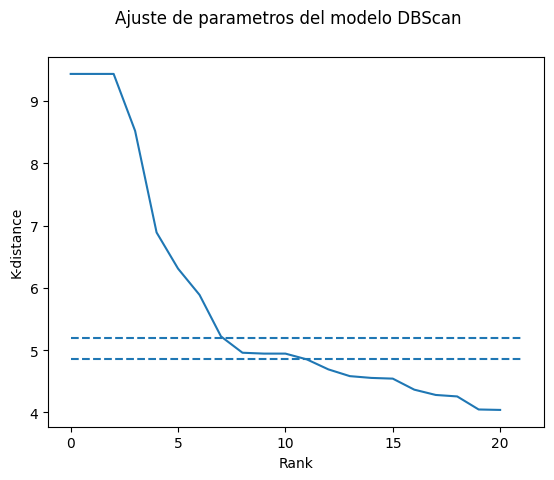

In [18]:


X = StandardScaler().fit_transform(df_corr)


# AJUSTE DE PARAMETROS
from scipy.spatial.distance import pdist, squareform

minPts = 14
# 2D
k = minPts - 1
D = squareform(pdist(X))
k_distances = np.zeros(D.shape[0])

for i in range(D.shape[0]):
    distances = np.sort(D[i])
    k_distances[i] = distances[k]

k_distances = np.sort(k_distances)
k_distances = k_distances[::-1]

import matplotlib.pyplot as plt#TODO: reemplazar por seaborn

plt.suptitle("Ajuste de parametros del modelo DBScan")
plt.plot(k_distances)
plt.xlabel("Rank")
plt.ylabel("K-distance")
plt.hlines([4.85, 5.2], 0, D.shape[0], linestyles="dashed");


In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=14)
y_pred = dbscan.fit_predict(X)
print("# cantidad de categorias")
print(pd.Series(pd.Series((dbscan.labels_)).unique()).count())


# cantidad de categorias
2


In [20]:
# cluster_dict.update(dict(zip(df_corr.columns, labels)))
# cluster_dict##TODO: automatizar el filtrado

In [21]:
cat_1_mask = y_pred == 0
cat_2_mask = ~ cat_1_mask

cat_1_mask_label = df_corr.loc[:, cat_1_mask].columns
cat_2_mask_label = df_corr.loc[:, cat_2_mask].columns


# 8) ENSAMBLE DE LOS DATASET

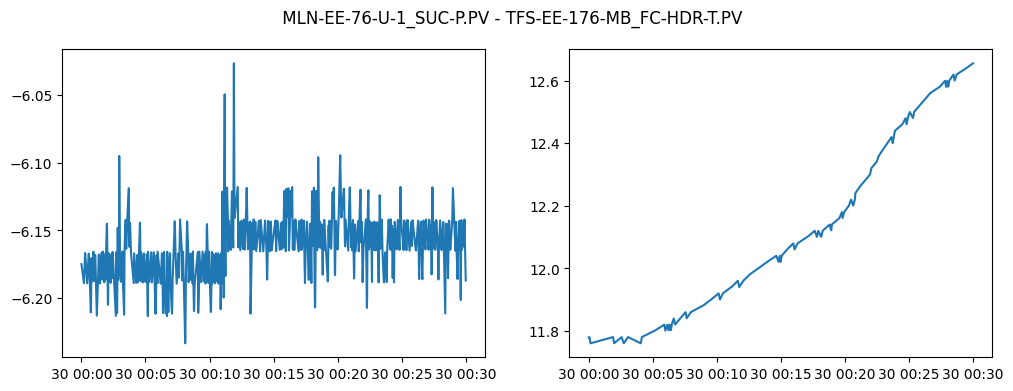

In [26]:
import random


data_sample_1 = data.loc[:, cat_1_mask_label]
data_sample_2 = data.loc[:, cat_2_mask_label]


def random_pick(data):
    return random.choice(data.columns)

label_1 = random_pick(data_sample_1)
label_2 = random_pick(data_sample_2)

sample_1 = data_sample_1.loc[:, label_1]
sample_2 = data_sample_2.loc[:, label_2]

plt.figure(figsize=[12, 4])
plt.suptitle(" {} - {} ".format(label_1, label_2))
plt.subplot(1, 2, 1)
plt.plot(sample_1)
plt.subplot(1, 2, 2)
plt.plot(sample_2)
plt.show()


In [27]:
df = pd.DataFrame()
df[label_1] = sample_1
df[label_2] = sample_2
df.index = sample_1.index
df

# save_object(df, "samples/data_sample_1_5")

,MLN-EE-76-U-1_SUC-P.PV,TFS-EE-176-MB_FC-HDR-T.PV
Time,,
2022-08-30 00:00:00,-6.174922,11.778991
2022-08-30 00:00:01,-6.176140,11.779258
2022-08-30 00:00:02,-6.177358,11.779524
2022-08-30 00:00:03,-6.178576,11.779791
2022-08-30 00:00:04,-6.179795,11.779009
...,...,...
2022-08-30 00:29:56,-6.158206,12.653633
2022-08-30 00:29:57,-6.166549,12.654133
2022-08-30 00:29:58,-6.174892,12.654633
